In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train_df = pd.read_csv('train.csv')

In [6]:
test_df = pd.read_csv('test.csv')

In [7]:
features_df = pd.read_csv('features.csv')

In [8]:
stores_df = pd.read_csv('stores.csv')

In [9]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [10]:
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [11]:
features_df['Date'] = pd.to_datetime(features_df['Date'])

In [12]:
train_new = pd.merge(train_df, features_df, on=['Store', 'Date', 'IsHoliday'], how = 'left')

In [13]:
train_new = pd.merge(train_new, stores_df, on='Store', how = 'left')

In [14]:
train_new.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315  
3         8.106    A  151315  
4         8.106    A  151315

In [15]:
def log_transform_WeeklySales(col):
    Weekly_Sales = col[0]
    
    if Weekly_Sales <= 0:
        return 0
    else:
        return np.log(Weekly_Sales)


In [16]:
#Log transform Weekly sales
train_new['Log_WeeklySales'] = train_new[['Weekly_Sales']].apply(log_transform_WeeklySales,axis=1)

In [17]:
#Function to have a temperature band
def temperature_band(col): 
    Temperature = col[0]
    if (Temperature < 0):
        return 'Less than 0'
    elif (Temperature >= 0) & (Temperature < 20):
        return 'Less than 20'
    elif (Temperature >= 20) & (Temperature < 40):
        return 'Less than 40'
    elif (Temperature >= 40) & (Temperature < 60):
        return 'Less than 60'
    elif (Temperature >= 60) & (Temperature < 70):
        return 'Less than 70'
    elif (Temperature >= 70) & (Temperature < 80):
        return 'Less than 80'
    else:
        return 'Greater than 80'
    

In [18]:
train_new['Temperature Band'] = train_new[['Temperature']].apply(temperature_band,axis=1)

In [19]:
#Function to have a CPI range
def CPI_RANGE(col): 
    CPI = col[0]
    if (CPI >= 125) &(CPI < 130):
        return 'Less than 130'
    elif (CPI >= 130) & (CPI < 135):
        return 'Between 130 and 135'
    elif (CPI >= 135) & (CPI < 140):
        return 'Between 135 and 140'
    elif (CPI >= 140) & (CPI < 145):
        return 'Between 140 and 145'
    elif (CPI >= 145) & (CPI < 190):
        return 'Between 145 and 190'
    elif (CPI >= 190) & (CPI < 210):
        return 'Between 190 and 210'
    elif (CPI >= 210) & (CPI < 230):
        return 'Between 210 and 230'


In [20]:
train_new['CPI_Range'] = train_new[['CPI']].apply(CPI_RANGE,axis=1)

In [21]:
train_new['MarkDown1'].isnull().sum()

270889

In [22]:
train_new['MarkDown2'].isnull().sum()

310322

In [23]:
train_new['MarkDown3'].isnull().sum()

284479

In [24]:
train_new['MarkDown4'].isnull().sum()

286603

In [25]:
train_new['MarkDown5'].isnull().sum()

270138

In [26]:
train_new['Store'].nunique() ## Number of unique stores

45

In [27]:
train_new['Dept'].nunique() ## Count of Depts

81

In [28]:
train_new['Store'].value_counts().head() #record count by stores

13    10474
10    10315
4     10272
1     10244
2     10238
Name: Store, dtype: int64

In [29]:
train_new['Dept'].value_counts().head()

1     6435
10    6435
38    6435
21    6435
67    6435
Name: Dept, dtype: int64

In [30]:
# Create new dataframe by taking only the features from the train_new dataframe that can be used for analysis
train_tseries = train_new[['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature Band', 'Fuel_Price', 'CPI_Range', 'Unemployment', 'Type', 'Size', 'Weekly_Sales']]

In [31]:
train_tseries.head()

Store  Dept       Date  IsHoliday Temperature Band  Fuel_Price  \
0      1     1 2010-02-05      False     Less than 60       2.572   
1      1     1 2010-02-12       True     Less than 40       2.548   
2      1     1 2010-02-19      False     Less than 40       2.514   
3      1     1 2010-02-26      False     Less than 60       2.561   
4      1     1 2010-03-05      False     Less than 60       2.625   

             CPI_Range  Unemployment Type    Size  Weekly_Sales  
0  Between 210 and 230         8.106    A  151315      24924.50  
1  Between 210 and 230         8.106    A  151315      46039.49  
2  Between 210 and 230         8.106    A  151315      41595.55  
3  Between 210 and 230         8.106    A  151315      19403.54  
4  Between 210 and 230         8.106    A  151315      21827.90

In [32]:
#train_tseries['W-1'] = train_tseries.groupby(['Store', 'Dept'])[['Weekly_Sales']].shift(1)

In [33]:
train_tseries.set_index('Date', inplace=True)

In [34]:
train_tseries.head()

Store  Dept  IsHoliday Temperature Band  Fuel_Price  \
Date                                                              
2010-02-05      1     1      False     Less than 60       2.572   
2010-02-12      1     1       True     Less than 40       2.548   
2010-02-19      1     1      False     Less than 40       2.514   
2010-02-26      1     1      False     Less than 60       2.561   
2010-03-05      1     1      False     Less than 60       2.625   

                      CPI_Range  Unemployment Type    Size  Weekly_Sales  
Date                                                                      
2010-02-05  Between 210 and 230         8.106    A  151315      24924.50  
2010-02-12  Between 210 and 230         8.106    A  151315      46039.49  
2010-02-19  Between 210 and 230         8.106    A  151315      41595.55  
2010-02-26  Between 210 and 230         8.106    A  151315      19403.54  
2010-03-05  Between 210 and 230         8.106    A  151315      21827.90

In [35]:
#Daily_Sales = train_tseries.loc[:,'Weekly_Sales'].resample('D').first().interpolate(method = 'linear')

### Min, max, std, median, mean of sales in 1day, 3days, 7days before your date per department / store

In [36]:
#### Min, max, std, median, mean of sales in 1day, 3days, 7days before your date per department / store
daily_sales = train_tseries.groupby(['Store', 'Dept']).resample('D')['Weekly_Sales'].first().interpolate(method='linear')

In [37]:
daily_sales = daily_sales.to_frame()

In [38]:
daily_sales.head(10)

Weekly_Sales
Store Dept Date                    
1     1    2010-02-05  24924.500000
           2010-02-06  27940.927143
           2010-02-07  30957.354286
           2010-02-08  33973.781429
           2010-02-09  36990.208571
           2010-02-10  40006.635714
           2010-02-11  43023.062857
           2010-02-12  46039.490000
           2010-02-13  45404.641429
           2010-02-14  44769.792857

In [39]:
daily_sales.columns = ['Sales']

In [40]:
daily_sales.head()

Sales
Store Dept Date                    
1     1    2010-02-05  24924.500000
           2010-02-06  27940.927143
           2010-02-07  30957.354286
           2010-02-08  33973.781429
           2010-02-09  36990.208571

In [41]:
#del(daily_sales)

In [42]:
## Previous 1 day, 3 days, 7 days (lag)
daily_sales['t-1'] = daily_sales['Sales'].shift(1)
daily_sales['t-3'] = daily_sales['Sales'].shift(3)
daily_sales['t-7'] = daily_sales['Sales'].shift(7)

In [43]:
daily_sales.head()

Sales           t-1           t-3  t-7
Store Dept Date                                                     
1     1    2010-02-05  24924.500000           NaN           NaN  NaN
           2010-02-06  27940.927143  24924.500000           NaN  NaN
           2010-02-07  30957.354286  27940.927143           NaN  NaN
           2010-02-08  33973.781429  30957.354286  24924.500000  NaN
           2010-02-09  36990.208571  33973.781429  27940.927143  NaN

In [44]:
#del(daily_sales)

In [45]:
## Mean, median, min and max for previous 3 days, 7 days

daily_sales['Mean_3D'] = daily_sales['Sales'].rolling(window=3).mean()
daily_sales['Mean_7D'] = daily_sales['Sales'].rolling(window=7).mean()

daily_sales['Median_3D'] = daily_sales['Sales'].rolling(window=3).median()
daily_sales['Median_7D'] = daily_sales['Sales'].rolling(window=7).median()

daily_sales['Min_3D'] = daily_sales['Sales'].rolling(window=3).min()
daily_sales['Min_7D'] = daily_sales['Sales'].rolling(window=7).min()
                                                        
daily_sales['Max_3D'] = daily_sales['Sales'].rolling(window=3).max()
daily_sales['Max_7D'] = daily_sales['Sales'].rolling(window=7).max()

In [46]:
daily_sales.head(10)

Sales           t-1           t-3           t-7  \
Store Dept Date                                                                 
1     1    2010-02-05  24924.500000           NaN           NaN           NaN   
           2010-02-06  27940.927143  24924.500000           NaN           NaN   
           2010-02-07  30957.354286  27940.927143           NaN           NaN   
           2010-02-08  33973.781429  30957.354286  24924.500000           NaN   
           2010-02-09  36990.208571  33973.781429  27940.927143           NaN   
           2010-02-10  40006.635714  36990.208571  30957.354286           NaN   
           2010-02-11  43023.062857  40006.635714  33973.781429           NaN   
           2010-02-12  46039.490000  43023.062857  36990.208571  24924.500000   
           2010-02-13  45404.641429  46039.490000  40006.635714  27940.927143   
           2010-02-14  44769.792857  45404.641429  43023.062857  30957.354286   

                            Mean_3D       Mean_7D     Median_3D     Median_7D  \
Store Dept Date                                                                 
1     1    2010-02-05           NaN           NaN           NaN           NaN   
           2010-02-06           NaN           NaN           NaN           NaN   
           2010-02-07  27940.927143           NaN  27940.927143           NaN   
           2010-02-08  30957.354286           NaN  30957.354286           NaN   
           2010-02-09  33973.781429           NaN  33973.781429           NaN   
           2010-02-10  36990.208571           NaN  36990.208571           NaN   
           2010-02-11  40006.635714  33973.781429  40006.635714  33973.781429   
           2010-02-12  43023.062857  36990.208571  43023.062857  36990.208571   
           2010-02-13  44822.398095  39485.024898  45404.641429  40006.635714   
           2010-02-14  45404.641429  41458.230408  45404.641429  43023.062857   

                             Min_3D        Min_7D        Max_3D        Max_7D  
Store Dept Date                                                                
1     1    2010-02-05           NaN           NaN           NaN           NaN  
           2010-02-06           NaN           NaN           NaN           NaN  
           2010-02-07  24924.500000           NaN  30957.354286           NaN  
           2010-02-08  27940.927143           NaN  33973.781429           NaN  
           2010-02-09  30957.354286           NaN  36990.208571           NaN  
           2010-02-10  33973.781429           NaN  40006.635714           NaN  
           2010-02-11  36990.208571  24924.500000  43023.062857  43023.062857  
           2010-02-12  40006.635714  27940.927143  46039.490000  46039.490000  
           2010-02-13  43023.062857  30957.354286  46039.490000  46039.490000  
           2010-02-14  44769.792857  33973.781429  46039.490000  46039.490000

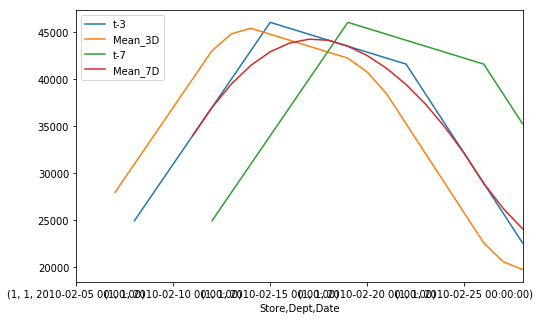

In [47]:
daily_sales.loc[(slice(1),slice(1),'2010-02'),['t-3','Mean_3D','t-7','Mean_7D']].plot(figsize=(8,5),subplots=False)#,xlim=(20000,40000))

### Resample to Monthly 

In [48]:
monthly_sales = train_tseries.groupby(['Store', 'Dept']).resample('M')['Weekly_Sales', 'IsHoliday'].sum()

In [49]:
monthly_sales.head(15)

Weekly_Sales  IsHoliday
Store Dept Date                               
1     1    2010-02-28     131963.08        1.0
           2010-03-31      91237.14        0.0
           2010-04-30     150516.76        0.0
           2010-05-31      66694.15        0.0
           2010-06-30      66740.70        0.0
           2010-07-31      81915.01        0.0
           2010-08-31      64578.81        0.0
           2010-09-30      71913.27        1.0
           2010-10-31     134644.53        0.0
           2010-11-30      92161.40        1.0
           2010-12-31     173983.88        1.0
           2011-01-31      69146.59        0.0
           2011-02-28     125762.63        1.0
           2011-03-31      82823.34        0.0
           2011-04-30     165056.95        0.0

In [50]:
monthly_sales.columns = ['Sales', 'IsHoliday']

In [51]:
#del(monthly_sales)

In [52]:
## Previous 1 month, 1 QTR, 6 months, last year (lag)#, next year (forward shift)
monthly_sales['Previous Month'] = monthly_sales['Sales'].shift(1)
monthly_sales['Previous Qtr'] = monthly_sales['Sales'].shift(3)
monthly_sales['6 Months Prior'] = monthly_sales['Sales'].shift(6)
monthly_sales['Last Year'] = monthly_sales['Sales'].shift(12)
#monthly_sales['Next Year'] = monthly_sales['Sales'].shift(-12)

In [53]:
monthly_sales['IsHoliday_PrevMonth'] = monthly_sales['IsHoliday'].shift(periods=1)
monthly_sales['IsHoliday_Prev Qtr'] = monthly_sales['IsHoliday'].shift(periods=3)
monthly_sales['IsHoliday_6 Months Prior'] = monthly_sales['IsHoliday'].shift(periods=6)
monthly_sales['IsHoliday_Last Year'] = monthly_sales['IsHoliday'].shift(periods=12)

In [54]:
monthly_sales.head(13)

Sales  IsHoliday  Previous Month  Previous Qtr  \
Store Dept Date                                                             
1     1    2010-02-28  131963.08        1.0             NaN           NaN   
           2010-03-31   91237.14        0.0       131963.08           NaN   
           2010-04-30  150516.76        0.0        91237.14           NaN   
           2010-05-31   66694.15        0.0       150516.76     131963.08   
           2010-06-30   66740.70        0.0        66694.15      91237.14   
           2010-07-31   81915.01        0.0        66740.70     150516.76   
           2010-08-31   64578.81        0.0        81915.01      66694.15   
           2010-09-30   71913.27        1.0        64578.81      66740.70   
           2010-10-31  134644.53        0.0        71913.27      81915.01   
           2010-11-30   92161.40        1.0       134644.53      64578.81   
           2010-12-31  173983.88        1.0        92161.40      71913.27   
           2011-01-31   69146.59        0.0       173983.88     134644.53   
           2011-02-28  125762.63        1.0        69146.59      92161.40   

                       6 Months Prior  Last Year  IsHoliday_PrevMonth  \
Store Dept Date                                                         
1     1    2010-02-28             NaN        NaN                  NaN   
           2010-03-31             NaN        NaN                  1.0   
           2010-04-30             NaN        NaN                  0.0   
           2010-05-31             NaN        NaN                  0.0   
           2010-06-30             NaN        NaN                  0.0   
           2010-07-31             NaN        NaN                  0.0   
           2010-08-31       131963.08        NaN                  0.0   
           2010-09-30        91237.14        NaN                  0.0   
           2010-10-31       150516.76        NaN                  1.0   
           2010-11-30        66694.15        NaN                  0.0   
           2010-12-31        66740.70        NaN                  1.0   
           2011-01-31        81915.01        NaN                  1.0   
           2011-02-28        64578.81  131963.08                  0.0   

                       IsHoliday_Prev Qtr  IsHoliday_6 Months Prior  \
Store Dept Date                                                       
1     1    2010-02-28                 NaN                       NaN   
           2010-03-31                 NaN                       NaN   
           2010-04-30                 NaN                       NaN   
           2010-05-31                 1.0                       NaN   
           2010-06-30                 0.0                       NaN   
           2010-07-31                 0.0                       NaN   
           2010-08-31                 0.0                       1.0   
           2010-09-30                 0.0                       0.0   
           2010-10-31                 0.0                       0.0   
           2010-11-30                 0.0                       0.0   
           2010-12-31                 1.0                       0.0   
           2011-01-31                 0.0                       0.0   
           2011-02-28                 1.0                       0.0   

                       IsHoliday_Last Year  
Store Dept Date                             
1     1    2010-02-28                  NaN  
           2010-03-31                  NaN  
           2010-04-30                  NaN  
           2010-05-31                  NaN  
           2010-06-30                  NaN  
           2010-07-31                  NaN  
           2010-08-31                  NaN  
           2010-09-30                  NaN  
           2010-10-31                  NaN  
           2010-11-30                  NaN  
           2010-12-31                  NaN  
           2011-01-31                  NaN  
           2011-02-28                  1.0

In [55]:
## Mean, median, std, min and max for previous QTR, previous 6 months, last year

monthly_sales['Mean_Qtr'] = monthly_sales['Sales'].rolling(window=3).mean()
monthly_sales['Mean_Half-Yrly'] = monthly_sales['Sales'].rolling(window=6).mean()
monthly_sales['Mean_Annual'] = monthly_sales['Sales'].rolling(window=12).mean()

monthly_sales['Median_Qtr'] = monthly_sales['Sales'].rolling(window=3).median()
monthly_sales['Median_Half-Yrly'] = monthly_sales['Sales'].rolling(window=6).median()
monthly_sales['Median_Annual'] = monthly_sales['Sales'].rolling(window=12).median()

monthly_sales['Std_Qtr'] = monthly_sales['Sales'].rolling(window=3).std()
monthly_sales['Std_Half-Yrly'] = monthly_sales['Sales'].rolling(window=6).std()
monthly_sales['Std_Annual'] = monthly_sales['Sales'].rolling(window=12).std()

monthly_sales['Min_Qtr'] = monthly_sales['Sales'].rolling(window=3).min()
monthly_sales['Min_Half-Yrly'] = monthly_sales['Sales'].rolling(window=6).min()
monthly_sales['Min_Annual'] = monthly_sales['Sales'].rolling(window=12).min()

monthly_sales['Max_Qtr'] = monthly_sales['Sales'].rolling(window=3).max()
monthly_sales['Max_Half-Yrly'] = monthly_sales['Sales'].rolling(window=6).max()
monthly_sales['Max_Half-Annual'] = monthly_sales['Sales'].rolling(window=12).max()



In [56]:
monthly_sales.head(13)

Sales  IsHoliday  Previous Month  Previous Qtr  \
Store Dept Date                                                             
1     1    2010-02-28  131963.08        1.0             NaN           NaN   
           2010-03-31   91237.14        0.0       131963.08           NaN   
           2010-04-30  150516.76        0.0        91237.14           NaN   
           2010-05-31   66694.15        0.0       150516.76     131963.08   
           2010-06-30   66740.70        0.0        66694.15      91237.14   
           2010-07-31   81915.01        0.0        66740.70     150516.76   
           2010-08-31   64578.81        0.0        81915.01      66694.15   
           2010-09-30   71913.27        1.0        64578.81      66740.70   
           2010-10-31  134644.53        0.0        71913.27      81915.01   
           2010-11-30   92161.40        1.0       134644.53      64578.81   
           2010-12-31  173983.88        1.0        92161.40      71913.27   
           2011-01-31   69146.59        0.0       173983.88     134644.53   
           2011-02-28  125762.63        1.0        69146.59      92161.40   

                       6 Months Prior  Last Year  IsHoliday_PrevMonth  \
Store Dept Date                                                         
1     1    2010-02-28             NaN        NaN                  NaN   
           2010-03-31             NaN        NaN                  1.0   
           2010-04-30             NaN        NaN                  0.0   
           2010-05-31             NaN        NaN                  0.0   
           2010-06-30             NaN        NaN                  0.0   
           2010-07-31             NaN        NaN                  0.0   
           2010-08-31       131963.08        NaN                  0.0   
           2010-09-30        91237.14        NaN                  0.0   
           2010-10-31       150516.76        NaN                  1.0   
           2010-11-30        66694.15        NaN                  0.0   
           2010-12-31        66740.70        NaN                  1.0   
           2011-01-31        81915.01        NaN                  1.0   
           2011-02-28        64578.81  131963.08                  0.0   

                       IsHoliday_Prev Qtr  IsHoliday_6 Months Prior  \
Store Dept Date                                                       
1     1    2010-02-28                 NaN                       NaN   
           2010-03-31                 NaN                       NaN   
           2010-04-30                 NaN                       NaN   
           2010-05-31                 1.0                       NaN   
           2010-06-30                 0.0                       NaN   
           2010-07-31                 0.0                       NaN   
           2010-08-31                 0.0                       1.0   
           2010-09-30                 0.0                       0.0   
           2010-10-31                 0.0                       0.0   
           2010-11-30                 0.0                       0.0   
           2010-12-31                 1.0                       0.0   
           2011-01-31                 0.0                       0.0   
           2011-02-28                 1.0                       0.0   

                       IsHoliday_Last Year       ...         Median_Annual  \
Store Dept Date                                  ...                         
1     1    2010-02-28                  NaN       ...                   NaN   
           2010-03-31                  NaN       ...                   NaN   
           2010-04-30                  NaN       ...                   NaN   
           2010-05-31                  NaN       ...                   NaN   
           2010-06-30                  NaN       ...                   NaN   
           2010-07-31                  NaN       ...                   NaN   
           2010-08-31                  NaN       ...                   NaN   
       

#### Min, max, std, median, mean of sales in prev 3 months, prev 6 months, last year before your date in ALL stores (overall trend)

In [57]:
#### Min, max, std, median, mean of sales in 1day, 3days, 7days before your date in all stores (overall trend)
stores_monthly = train_tseries.resample('M')['Weekly_Sales', 'IsHoliday'].sum()

In [58]:
stores_monthly['IsHoliday'] = stores_monthly['IsHoliday'].apply(lambda x: 1 if x > 1 else 0)

In [59]:
stores_monthly.head(15)

Weekly_Sales  IsHoliday
Date                               
2010-02-28  1.903330e+08          1
2010-03-31  1.819198e+08          0
2010-04-30  2.314124e+08          0
2010-05-31  1.867109e+08          0
2010-06-30  1.922462e+08          0
2010-07-31  2.325801e+08          0
2010-08-31  1.876401e+08          0
2010-09-30  1.772679e+08          1
2010-10-31  2.171618e+08          0
2010-11-30  2.028534e+08          1
2010-12-31  2.887605e+08          1
2011-01-31  1.637040e+08          0
2011-02-28  1.863313e+08          1
2011-03-31  1.793564e+08          0
2011-04-30  2.265265e+08          0

In [60]:
stores_monthly['Log_Sales']=np.log(stores_monthly['Weekly_Sales'])

In [61]:
del(stores_monthly['Weekly_Sales'])

In [62]:
stores_monthly.head(13)

IsHoliday  Log_Sales
Date                            
2010-02-28          1  19.064286
2010-03-31          0  19.019077
2010-04-30          0  19.259712
2010-05-31          0  19.045072
2010-06-30          0  19.074287
2010-07-31          0  19.264745
2010-08-31          0  19.050036
2010-09-30          1  18.993173
2010-10-31          0  19.196153
2010-11-30          1  19.127994
2010-12-31          1  19.481108
2011-01-31          0  18.913570
2011-02-28          1  19.043037

In [63]:
stores_monthly['Prev Month'] = stores_monthly['Log_Sales'].shift(1)
stores_monthly['Prev Qtr'] = stores_monthly['Log_Sales'].shift(3)
stores_monthly['6 Months Prior'] = stores_monthly['Log_Sales'].shift(6)
stores_monthly['Last Year'] = stores_monthly['Log_Sales'].shift(12)

stores_monthly['Holiday-Prev Month'] = stores_monthly['IsHoliday'].shift(1)
stores_monthly['Holiday-Prev Qtr'] = stores_monthly['IsHoliday'].shift(3)
stores_monthly['Hoiday-6 Months Prior'] = stores_monthly['IsHoliday'].shift(6)
stores_monthly['Holiday-Last Year'] = stores_monthly['IsHoliday'].shift(12)

In [64]:
## Mean, median, std, min and max for previous QTR, previous 6 months, last year
stores_monthly['Mean_Qtr'] = stores_monthly['Log_Sales'].rolling(window=3).mean()
stores_monthly['Mean_Half-Yrly'] = stores_monthly['Log_Sales'].rolling(window=6).mean()
stores_monthly['Mean_Annual'] = stores_monthly['Log_Sales'].rolling(window=12).mean()

stores_monthly['Median_Qtr'] = stores_monthly['Log_Sales'].rolling(window=3).median()
stores_monthly['Median_Half-Yrly'] = stores_monthly['Log_Sales'].rolling(window=6).median()
stores_monthly['Median_Annual'] = stores_monthly['Log_Sales'].rolling(window=12).median()

stores_monthly['Std_Qtr'] = stores_monthly['Log_Sales'].rolling(window=3).std()
stores_monthly['Std_Half-Yrly'] = stores_monthly['Log_Sales'].rolling(window=6).std()
stores_monthly['Std_Annual'] = stores_monthly['Log_Sales'].rolling(window=12).std()

stores_monthly['Min_Qtr'] = stores_monthly['Log_Sales'].rolling(window=3).min()
stores_monthly['Min_Half-Yrly'] = stores_monthly['Log_Sales'].rolling(window=6).min()
stores_monthly['Min_Annual'] = stores_monthly['Log_Sales'].rolling(window=12).min()

stores_monthly['Max_Qtr'] = stores_monthly['Log_Sales'].rolling(window=3).max()
stores_monthly['Max_Half-Yrly'] = stores_monthly['Log_Sales'].rolling(window=6).max()
stores_monthly['Max_Annual'] = stores_monthly['Log_Sales'].rolling(window=12).max()

In [65]:
stores_monthly.head(13)

IsHoliday  Log_Sales  Prev Month   Prev Qtr  6 Months Prior  \
Date                                                                      
2010-02-28          1  19.064286         NaN        NaN             NaN   
2010-03-31          0  19.019077   19.064286        NaN             NaN   
2010-04-30          0  19.259712   19.019077        NaN             NaN   
2010-05-31          0  19.045072   19.259712  19.064286             NaN   
2010-06-30          0  19.074287   19.045072  19.019077             NaN   
2010-07-31          0  19.264745   19.074287  19.259712             NaN   
2010-08-31          0  19.050036   19.264745  19.045072       19.064286   
2010-09-30          1  18.993173   19.050036  19.074287       19.019077   
2010-10-31          0  19.196153   18.993173  19.264745       19.259712   
2010-11-30          1  19.127994   19.196153  19.050036       19.045072   
2010-12-31          1  19.481108   19.127994  18.993173       19.074287   
2011-01-31          0  18.913570   19.481108  19.196153       19.264745   
2011-02-28          1  19.043037   18.913570  19.127994       19.050036   

            Last Year  Holiday-Prev Month  Holiday-Prev Qtr  \
Date                                                          
2010-02-28        NaN                 NaN               NaN   
2010-03-31        NaN                 1.0               NaN   
2010-04-30        NaN                 0.0               NaN   
2010-05-31        NaN                 0.0               1.0   
2010-06-30        NaN                 0.0               0.0   
2010-07-31        NaN                 0.0               0.0   
2010-08-31        NaN                 0.0               0.0   
2010-09-30        NaN                 0.0               0.0   
2010-10-31        NaN                 1.0               0.0   
2010-11-30        NaN                 0.0               0.0   
2010-12-31        NaN                 1.0               1.0   
2011-01-31        NaN                 1.0               0.0   
2011-02-28  19.064286                 0.0               1.0   

            Hoiday-6 Months Prior  Holiday-Last Year     ...      \
Date                                                     ...       
2010-02-28                    NaN                NaN     ...       
2010-03-31                    NaN                NaN     ...       
2010-04-30                    NaN                NaN     ...       
2010-05-31                    NaN                NaN     ...       
2010-06-30                    NaN                NaN     ...       
2010-07-31                    NaN                NaN     ...       
2010-08-31                    1.0                NaN     ...       
2010-09-30                    0.0                NaN     ...       
2010-10-31                    0.0                NaN     ...       
2010-11-30                    0.0                NaN     ...       
2010-12-31                    0.0                NaN     ...       
2011-01-31                    0.0                NaN     ...       
2011-02-28                    0.0                1.0     ...       

            Median_Annual   Std_Qtr  Std_Half-Yrly  Std_Annual    Min_Qtr  \
Date                                                                        
2010-02-28            NaN       NaN            NaN         NaN        NaN   
2010-03-31            NaN       NaN            NaN         NaN        NaN   
2010-04-30            NaN  0.127894            NaN         NaN  19.019077   
2010-05-31            NaN  0.132068            NaN         NaN  19.019077   
2010-06-30            NaN  0.116409            NaN         NaN  19.045072   
2010-07-31            NaN  0.119292       0.110865         NaN  19.045072   
2010-08-31            NaN  0.117589       0.112469         NaN  19.050036   
2010-09-30            NaN  0.143228       0.117451         NaN  18.993173   
2010-10-31            NaN  0.104710       0.103809         NaN  18.993173   
2010-11-30            NaN  0.103299       0.099853         NaN  18.99317

In [66]:
train_tseries.head(10)

Store  Dept  IsHoliday Temperature Band  Fuel_Price  \
Date                                                              
2010-02-05      1     1      False     Less than 60       2.572   
2010-02-12      1     1       True     Less than 40       2.548   
2010-02-19      1     1      False     Less than 40       2.514   
2010-02-26      1     1      False     Less than 60       2.561   
2010-03-05      1     1      False     Less than 60       2.625   
2010-03-12      1     1      False     Less than 60       2.667   
2010-03-19      1     1      False     Less than 60       2.720   
2010-03-26      1     1      False     Less than 60       2.732   
2010-04-02      1     1      False     Less than 70       2.719   
2010-04-09      1     1      False     Less than 70       2.770   

                      CPI_Range  Unemployment Type    Size  Weekly_Sales  
Date                                                                      
2010-02-05  Between 210 and 230         8.106    A  151315      24924.50  
2010-02-12  Between 210 and 230         8.106    A  151315      46039.49  
2010-02-19  Between 210 and 230         8.106    A  151315      41595.55  
2010-02-26  Between 210 and 230         8.106    A  151315      19403.54  
2010-03-05  Between 210 and 230         8.106    A  151315      21827.90  
2010-03-12  Between 210 and 230         8.106    A  151315      21043.39  
2010-03-19  Between 210 and 230         8.106    A  151315      22136.64  
2010-03-26  Between 210 and 230         8.106    A  151315      26229.21  
2010-04-02  Between 210 and 230         7.808    A  151315      57258.43  
2010-04-09  Between 210 and 230         7.808    A  151315      42960.91

### change in Unemployment rate in last month / last quarter / last 6 months/ last year

In [67]:
unemp = train_tseries[['Unemployment']]

In [68]:
unemp.head(10)

Unemployment
Date                    
2010-02-05         8.106
2010-02-12         8.106
2010-02-19         8.106
2010-02-26         8.106
2010-03-05         8.106
2010-03-12         8.106
2010-03-19         8.106
2010-03-26         8.106
2010-04-02         7.808
2010-04-09         7.808

In [69]:
unemp_Monthly = unemp.resample('M').mean()

In [70]:
unemp_Monthly.head(10)

Unemployment
Date                    
2010-02-28      8.570455
2010-03-31      8.575151
2010-04-30      8.446687
2010-05-31      8.450495
2010-06-30      8.452238
2010-07-31      8.381368
2010-08-31      8.385104
2010-09-30      8.382072
2010-10-31      8.429697
2010-11-30      8.427437

In [71]:
unemp_Monthly['PctChange'] = unemp_Monthly['Unemployment'].pct_change().mul(100)

In [72]:
unemp_Monthly.head(10)

Unemployment  PctChange
Date                               
2010-02-28      8.570455        NaN
2010-03-31      8.575151   0.054789
2010-04-30      8.446687  -1.498091
2010-05-31      8.450495   0.045079
2010-06-30      8.452238   0.020624
2010-07-31      8.381368  -0.838477
2010-08-31      8.385104   0.044583
2010-09-30      8.382072  -0.036162
2010-10-31      8.429697   0.568176
2010-11-30      8.427437  -0.026809

In [73]:
## Previous 1 month, 1 QTR, 6 months, last year (lag)#, next year (forward shift)
unemp_Monthly['Unemp-Prev 1 month'] = unemp_Monthly['Unemployment'].shift(1)
unemp_Monthly['% Change-Prev 1 month'] = unemp_Monthly['Unemp-Prev 1 month'].pct_change().mul(100)

unemp_Monthly['Unemp-Prev QTR'] = unemp_Monthly['Unemployment'].shift(3)
unemp_Monthly['% Change-Prev QTR'] = unemp_Monthly['Unemp-Prev QTR'].pct_change().mul(100)

unemp_Monthly['Unemp-Prev 6 month'] = unemp_Monthly['Unemployment'].shift(6)
unemp_Monthly['% Change-Prev 6 month'] = unemp_Monthly['Unemp-Prev 6 month'].pct_change().mul(100)

unemp_Monthly['Unemp-Last Year'] = unemp_Monthly['Unemployment'].shift(12)
unemp_Monthly['% Change-Last Year'] = unemp_Monthly['Unemp-Last Year'].pct_change().mul(100)

In [74]:
unemp_Monthly.head(10)

Unemployment  PctChange  Unemp-Prev 1 month  \
Date                                                      
2010-02-28      8.570455        NaN                 NaN   
2010-03-31      8.575151   0.054789            8.570455   
2010-04-30      8.446687  -1.498091            8.575151   
2010-05-31      8.450495   0.045079            8.446687   
2010-06-30      8.452238   0.020624            8.450495   
2010-07-31      8.381368  -0.838477            8.452238   
2010-08-31      8.385104   0.044583            8.381368   
2010-09-30      8.382072  -0.036162            8.385104   
2010-10-31      8.429697   0.568176            8.382072   
2010-11-30      8.427437  -0.026809            8.429697   

            % Change-Prev 1 month  Unemp-Prev QTR  % Change-Prev QTR  \
Date                                                                   
2010-02-28                    NaN             NaN                NaN   
2010-03-31                    NaN             NaN                NaN   
2010-04-30               0.054789             NaN                NaN   
2010-05-31              -1.498091        8.570455                NaN   
2010-06-30               0.045079        8.575151           0.054789   
2010-07-31               0.020624        8.446687          -1.498091   
2010-08-31              -0.838477        8.450495           0.045079   
2010-09-30               0.044583        8.452238           0.020624   
2010-10-31              -0.036162        8.381368          -0.838477   
2010-11-30               0.568176        8.385104           0.044583   

            Unemp-Prev 6 month  % Change-Prev 6 month  Unemp-Last Year  \
Date                                                                     
2010-02-28                 NaN                    NaN              NaN   
2010-03-31                 NaN                    NaN              NaN   
2010-04-30                 NaN                    NaN              NaN   
2010-05-31                 NaN                    NaN              NaN   
2010-06-30                 NaN                    NaN              NaN   
2010-07-31                 NaN                    NaN              NaN   
2010-08-31            8.570455                    NaN              NaN   
2010-09-30            8.575151               0.054789              NaN   
2010-10-31            8.446687              -1.498091              NaN   
2010-11-30            8.450495               0.045079              NaN   

            % Change-Last Year  
Date                            
2010-02-28                 NaN  
2010-03-31                 NaN  
2010-04-30                 NaN  
2010-05-31                 NaN  
2010-06-30                 NaN  
2010-07-31                 NaN  
2010-08-31                 NaN  
2010-09-30                 NaN  
2010-10-31                 NaN  
2010-11-30                 NaN

### Visualization

In [75]:
monthly_sales.head()

Sales  IsHoliday  Previous Month  Previous Qtr  \
Store Dept Date                                                             
1     1    2010-02-28  131963.08        1.0             NaN           NaN   
           2010-03-31   91237.14        0.0       131963.08           NaN   
           2010-04-30  150516.76        0.0        91237.14           NaN   
           2010-05-31   66694.15        0.0       150516.76     131963.08   
           2010-06-30   66740.70        0.0        66694.15      91237.14   

                       6 Months Prior  Last Year  IsHoliday_PrevMonth  \
Store Dept Date                                                         
1     1    2010-02-28             NaN        NaN                  NaN   
           2010-03-31             NaN        NaN                  1.0   
           2010-04-30             NaN        NaN                  0.0   
           2010-05-31             NaN        NaN                  0.0   
           2010-06-30             NaN        NaN                  0.0   

                       IsHoliday_Prev Qtr  IsHoliday_6 Months Prior  \
Store Dept Date                                                       
1     1    2010-02-28                 NaN                       NaN   
           2010-03-31                 NaN                       NaN   
           2010-04-30                 NaN                       NaN   
           2010-05-31                 1.0                       NaN   
           2010-06-30                 0.0                       NaN   

                       IsHoliday_Last Year       ...         Median_Annual  \
Store Dept Date                                  ...                         
1     1    2010-02-28                  NaN       ...                   NaN   
           2010-03-31                  NaN       ...                   NaN   
           2010-04-30                  NaN       ...                   NaN   
           2010-05-31                  NaN       ...                   NaN   
           2010-06-30                  NaN       ...                   NaN   

                            Std_Qtr  Std_Half-Yrly  Std_Annual   Min_Qtr  \
Store Dept Date                                                            
1     1    2010-02-28           NaN            NaN         NaN       NaN   
           2010-03-31           NaN            NaN         NaN       NaN   
           2010-04-30  30323.023645            NaN         NaN  91237.14   
           2010-05-31  43094.202341            NaN         NaN  66694.15   
           2010-06-30  48381.574219            NaN         NaN  66694.15   

                       Min_Half-Yrly  Min_Annual    Max_Qtr  Max_Half-Yrly  \
Store Dept Date                                                              
1     1    2010-02-28            NaN         NaN        NaN            NaN   
           2010-03-31            NaN         NaN        NaN            NaN   
           2010-04-30            NaN         NaN  150516.76            NaN   
           2010-05-31            NaN         NaN  150516.76            NaN   
           2010-06-30            NaN         NaN  150516.76            NaN   

                       Max_Half-Annual  
Store Dept Date                         
1     1    2010-02-28              NaN  
           2010-03-31              NaN  
           2010-04-30              NaN  
           2010-05-31              NaN  
           2010-06-30              NaN  

[5 rows x 25 columns]

In [76]:
stores_monthly.head()

IsHoliday  Log_Sales  Prev Month   Prev Qtr  6 Months Prior  \
Date                                                                      
2010-02-28          1  19.064286         NaN        NaN             NaN   
2010-03-31          0  19.019077   19.064286        NaN             NaN   
2010-04-30          0  19.259712   19.019077        NaN             NaN   
2010-05-31          0  19.045072   19.259712  19.064286             NaN   
2010-06-30          0  19.074287   19.045072  19.019077             NaN   

            Last Year  Holiday-Prev Month  Holiday-Prev Qtr  \
Date                                                          
2010-02-28        NaN                 NaN               NaN   
2010-03-31        NaN                 1.0               NaN   
2010-04-30        NaN                 0.0               NaN   
2010-05-31        NaN                 0.0               1.0   
2010-06-30        NaN                 0.0               0.0   

            Hoiday-6 Months Prior  Holiday-Last Year     ...      \
Date                                                     ...       
2010-02-28                    NaN                NaN     ...       
2010-03-31                    NaN                NaN     ...       
2010-04-30                    NaN                NaN     ...       
2010-05-31                    NaN                NaN     ...       
2010-06-30                    NaN                NaN     ...       

            Median_Annual   Std_Qtr  Std_Half-Yrly  Std_Annual    Min_Qtr  \
Date                                                                        
2010-02-28            NaN       NaN            NaN         NaN        NaN   
2010-03-31            NaN       NaN            NaN         NaN        NaN   
2010-04-30            NaN  0.127894            NaN         NaN  19.019077   
2010-05-31            NaN  0.132068            NaN         NaN  19.019077   
2010-06-30            NaN  0.116409            NaN         NaN  19.045072   

            Min_Half-Yrly  Min_Annual    Max_Qtr  Max_Half-Yrly  Max_Annual  
Date                                                                         
2010-02-28            NaN         NaN        NaN            NaN         NaN  
2010-03-31            NaN         NaN        NaN            NaN         NaN  
2010-04-30            NaN         NaN  19.259712            NaN         NaN  
2010-05-31            NaN         NaN  19.259712            NaN         NaN  
2010-06-30            NaN         NaN  19.259712            NaN         NaN  

[5 rows x 25 columns]

In [77]:
#ax=stores_monthly.loc[:,['Log_Sales','Prev Month','Prev Qtr', '6 Months Prior', 'Last Year']].plot(figsize=(10,8),subplots=True)



In [78]:
#monthly_sales.loc[(slice(1),slice(1),'2010'),'Sales'].plot(figsize=(8,6))

In [79]:
msales=monthly_sales.reset_index()

In [80]:
msales.head()

Store  Dept       Date      Sales  IsHoliday  Previous Month  Previous Qtr  \
0      1     1 2010-02-28  131963.08        1.0             NaN           NaN   
1      1     1 2010-03-31   91237.14        0.0       131963.08           NaN   
2      1     1 2010-04-30  150516.76        0.0        91237.14           NaN   
3      1     1 2010-05-31   66694.15        0.0       150516.76     131963.08   
4      1     1 2010-06-30   66740.70        0.0        66694.15      91237.14   

   6 Months Prior  Last Year  IsHoliday_PrevMonth       ...         \
0             NaN        NaN                  NaN       ...          
1             NaN        NaN                  1.0       ...          
2             NaN        NaN                  0.0       ...          
3             NaN        NaN                  0.0       ...          
4             NaN        NaN                  0.0       ...          

   Median_Annual       Std_Qtr  Std_Half-Yrly  Std_Annual   Min_Qtr  \
0            NaN           NaN            NaN         NaN       NaN   
1            NaN           NaN            NaN         NaN       NaN   
2            NaN  30323.023645            NaN         NaN  91237.14   
3            NaN  43094.202341            NaN         NaN  66694.15   
4            NaN  48381.574219            NaN         NaN  66694.15   

   Min_Half-Yrly  Min_Annual    Max_Qtr  Max_Half-Yrly  Max_Half-Annual  
0            NaN         NaN        NaN            NaN              NaN  
1            NaN         NaN        NaN            NaN              NaN  
2            NaN         NaN  150516.76            NaN              NaN  
3            NaN         NaN  150516.76            NaN              NaN  
4            NaN         NaN  150516.76            NaN              NaN  

[5 rows x 28 columns]

In [81]:
msales['Year'] = msales['Date'].dt.year

In [82]:
msales['Month'] =msales['Date'].dt.month

In [83]:
msales.head()

Store  Dept       Date      Sales  IsHoliday  Previous Month  Previous Qtr  \
0      1     1 2010-02-28  131963.08        1.0             NaN           NaN   
1      1     1 2010-03-31   91237.14        0.0       131963.08           NaN   
2      1     1 2010-04-30  150516.76        0.0        91237.14           NaN   
3      1     1 2010-05-31   66694.15        0.0       150516.76     131963.08   
4      1     1 2010-06-30   66740.70        0.0        66694.15      91237.14   

   6 Months Prior  Last Year  IsHoliday_PrevMonth  ...    Std_Half-Yrly  \
0             NaN        NaN                  NaN  ...              NaN   
1             NaN        NaN                  1.0  ...              NaN   
2             NaN        NaN                  0.0  ...              NaN   
3             NaN        NaN                  0.0  ...              NaN   
4             NaN        NaN                  0.0  ...              NaN   

   Std_Annual   Min_Qtr  Min_Half-Yrly  Min_Annual    Max_Qtr  Max_Half-Yrly  \
0         NaN       NaN            NaN         NaN        NaN            NaN   
1         NaN       NaN            NaN         NaN        NaN            NaN   
2         NaN  91237.14            NaN         NaN  150516.76            NaN   
3         NaN  66694.15            NaN         NaN  150516.76            NaN   
4         NaN  66694.15            NaN         NaN  150516.76            NaN   

   Max_Half-Annual  Year  Month  
0              NaN  2010      2  
1              NaN  2010      3  
2              NaN  2010      4  
3              NaN  2010      5  
4              NaN  2010      6  

[5 rows x 30 columns]

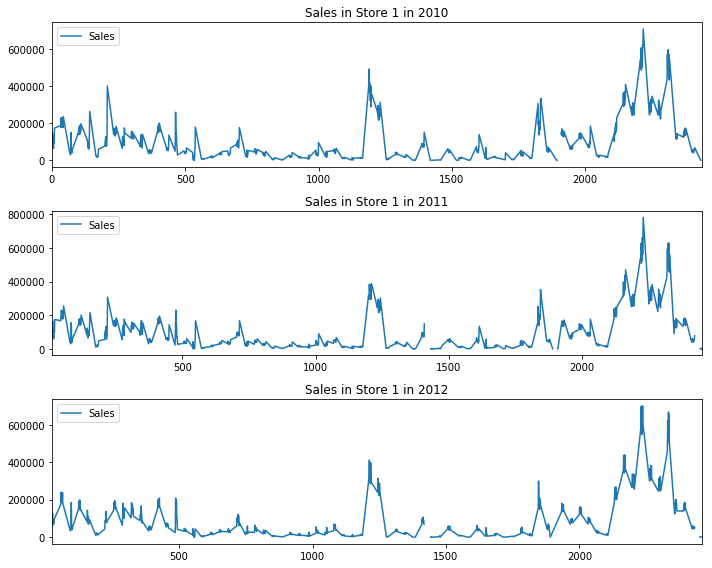

In [84]:
fig, ax = plt.subplots(3,1)
msales[(msales['Store']== 1)  & (msales['Year'] == 2010)][['Sales']].plot(figsize=(10,8),title='Sales in Store 1 in 2010', ax=ax[0])
msales[(msales['Store']== 1)  & (msales['Year'] == 2011)][['Sales']].plot(figsize=(10,8),title='Sales in Store 1 in 2011', ax=ax[1])
msales[(msales['Store']== 1)  & (msales['Year'] == 2012)][['Sales']].plot(figsize=(10,8),title='Sales in Store 1 in 2012', ax=ax[2])
plt.tight_layout()

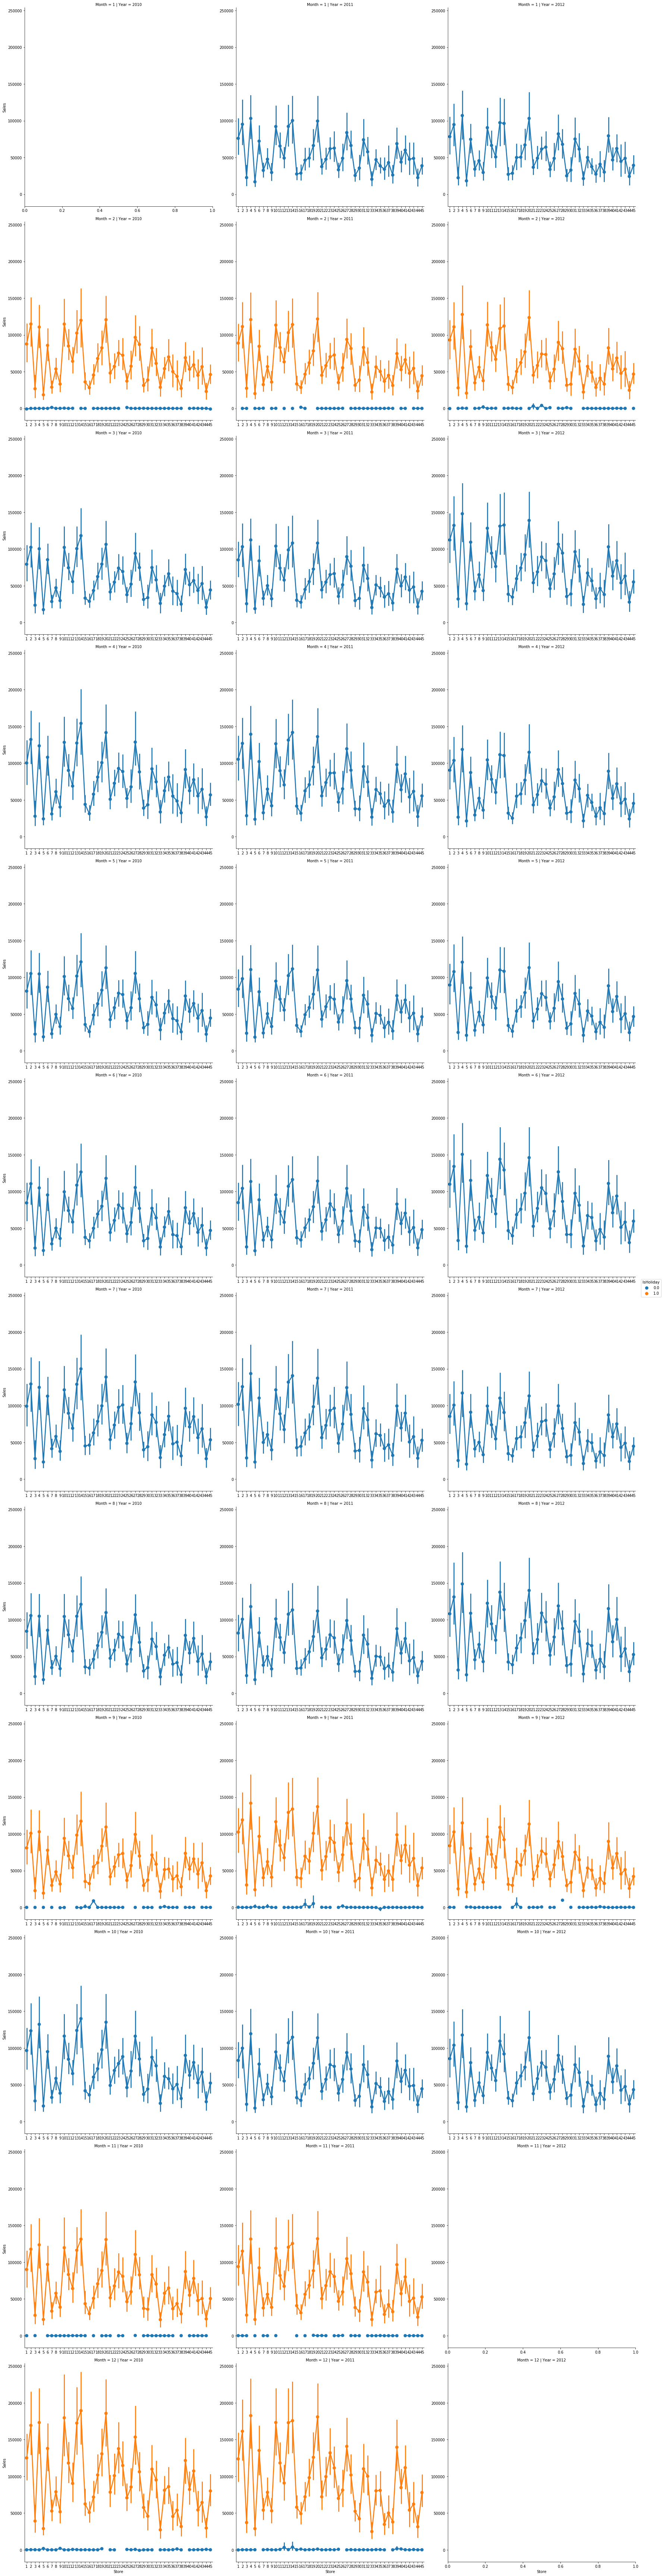

In [85]:
#Sales of Stores plotted by Year, Month with IsHoliday flag.
sns.factorplot(x='Store',y='Sales',data=msales,col='Year',row='Month',hue='IsHoliday',size=8,sharex=False)


In [86]:
msales.columns

Index(['Store', 'Dept', 'Date', 'Sales', 'IsHoliday', 'Previous Month',
       'Previous Qtr', '6 Months Prior', 'Last Year', 'IsHoliday_PrevMonth',
       'IsHoliday_Prev Qtr', 'IsHoliday_6 Months Prior', 'IsHoliday_Last Year',
       'Mean_Qtr', 'Mean_Half-Yrly', 'Mean_Annual', 'Median_Qtr',
       'Median_Half-Yrly', 'Median_Annual', 'Std_Qtr', 'Std_Half-Yrly',
       'Std_Annual', 'Min_Qtr', 'Min_Half-Yrly', 'Min_Annual', 'Max_Qtr',
       'Max_Half-Yrly', 'Max_Half-Annual', 'Year', 'Month'],
      dtype='object')

In [89]:
msales.groupby(['Store'])[['Sales']].sum().sort_values(by='Sales',ascending=False).head()

Sales
Store              
20     3.013978e+08
4      2.995440e+08
14     2.889999e+08
13     2.865177e+08
2      2.753824e+08

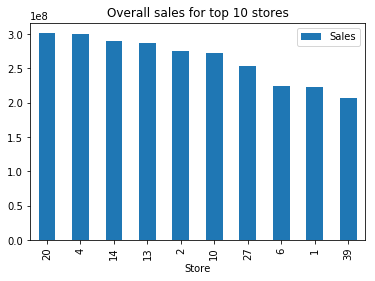

In [92]:
msales.groupby(['Store'])[['Sales']].sum().sort_values(by='Sales',ascending=False).head(10).plot(kind='bar',title='Overall sales for top 10 stores')

In [97]:
str_sales = msales.groupby(['Store','Year'])[['Sales']].sum()

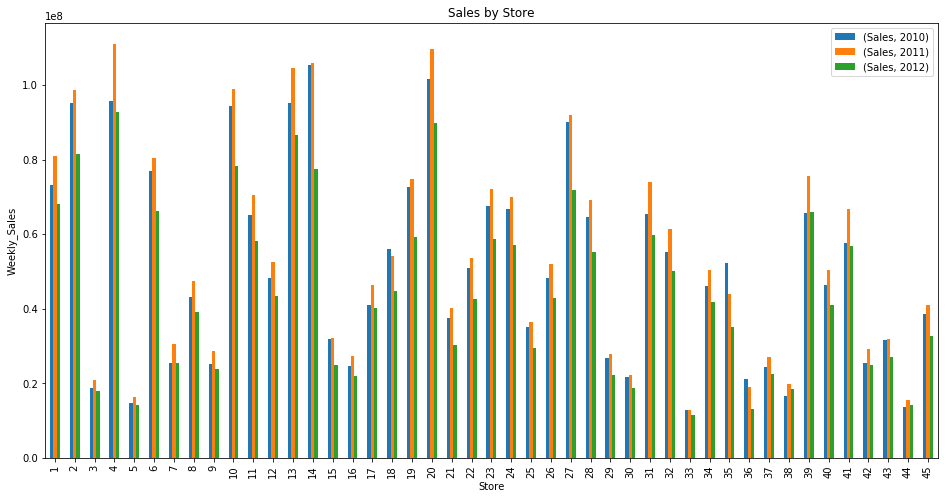

In [113]:
str_sales.unstack(level=1).plot(kind='bar',figsize=(16,8))
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.title('Sales by Store')
plt.legend(loc=0)

In [115]:
str_sales_holiday = msales.groupby(['Store','Year','IsHoliday'])[['Sales']].sum()

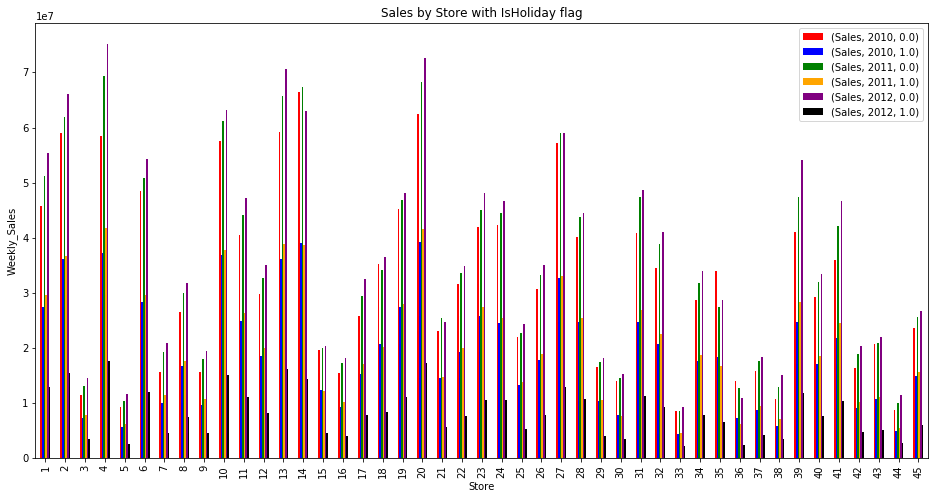

In [126]:
str_sales_holiday.unstack(level=1).unstack(level=1).plot(kind='bar',figsize=(16,8),color=['red','blue','green','orange','purple','black'])
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.title('Sales by Store with IsHoliday flag')
plt.legend(loc=0)

In [172]:
#train_tseries.loc['2010-02-05',['Temperature Band']]
train_tseries.groupby([train_tseries.index.year,train_tseries.index.month,train_tseries['Store']])[['Temperature Band']].first().unstack(level=0).unstack(level=0)

Temperature Band                                            \
Date              2010                                             
Date                1             2             3             4    
Store                                                              
1                 None  Less than 60  Less than 60  Less than 70   
2                 None  Less than 60  Less than 60  Less than 70   
3                 None  Less than 60  Less than 60  Less than 70   
4                 None  Less than 60  Less than 60  Less than 60   
5                 None  Less than 40  Less than 60  Less than 70   
6                 None  Less than 60  Less than 60  Less than 70   
7                 None  Less than 20  Less than 40  Less than 40   
8                 None  Less than 40  Less than 60  Less than 70   
9                 None  Less than 40  Less than 60  Less than 70   
10                None  Less than 60  Less than 60  Less than 70   
11                None  Less than 60  Less than 60  Less than 70   
12                None  Less than 60  Less than 60  Less than 60   
13                None  Less than 40  Less than 60  Less than 60   
14                None  Less than 40  Less than 40  Less than 60   
15                None  Less than 20  Less than 40  Less than 60   
16                None  Less than 20  Less than 40  Less than 40   
17                None  Less than 40  Less than 40  Less than 40   
18                None  Less than 40  Less than 40  Less than 60   
19                None  Less than 40  Less than 40  Less than 60   
20                None  Less than 40  Less than 40  Less than 60   
21                None  Less than 40  Less than 60  Less than 70   
22                None  Less than 40  Less than 40  Less than 60   
23                None  Less than 20  Less than 40  Less than 60   
24                None  Less than 40  Less than 40  Less than 60   
25                None  Less than 40  Less than 40  Less than 60   
26                None  Less than 20  Less than 40  Less than 40   
27                None  Less than 40  Less than 40  Less than 60   
28                None  Less than 60  Less than 60  Less than 60   
29                None  Less than 40  Less than 40  Less than 60   
30                None  Less than 40  Less than 60  Less than 70   
31                None  Less than 40  Less than 60  Less than 70   
32                None  Less than 40  Less than 40  Less than 60   
33                None  Less than 60  Less than 60  Less than 70   
34                None  Less than 40  Less than 60  Less than 60   
35                None  Less than 40  Less than 40  Less than 60   
36                None  Less than 60  Less than 60  Less than 70   
37                None  Less than 60  Less than 60  Less than 70   
38                None  Less than 60  Less than 60  Less than 60   
39                None  Less than 60  Less than 60  Less than 70   
40                None  Less than 20  Less than 40  Less than 60   
41                None  Less than 40  Less than 40  Less than 60   
42                None  Less than 60  Less than 60  Less than 70   
43                None  Less than 60  Less than 60  Less than 70   
44                None  Less than 40  Less than 60  Less than 60   
45                None  Less than 40  Less than 40  Less than 60   

                                                                        \
Date                                                                     
Date             5                6                7                8    
Store                                                                    
1      Less than 80  Greater than 80  Greater than 80  Greater than 80   
2      Less than 80  Greater than 80  Greater than 80  Greater than 80   
3      Less than 80     Less than 80  Greater than 80  Greater than 80   
4      Less than 60     Less than 80     Less than 80     Less than 80   
5      Less than 80     Less than 80  Greater than 80  Greater than 80   
6      

In [181]:
#train_tseries.loc['2010-02-05',['Temperature Band']]
try:
    train_tseries.groupby([train_tseries.index.year,train_tseries.index.month,train_tseries['Store']])[['Temperature Band']].first().unstack(level=0).plot(kind='bar')
except TypeError:
    print("No numeric data to plot")

No numeric data to plot
